# Random Forest Feature Importances

In [1]:
%matplotlib inline

from pandas import DataFrame, Series
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

In [2]:
#Read in Titanic Data
titanic = pd.read_csv("../../datasets/titanic/train.csv")

titanic_only = pd.get_dummies(titanic,columns=['Sex','Pclass','Embarked'],drop_first=True)

In [3]:
#Drop columns we don't care about (yet) or have missing values (Models don't like missing values)
titanic_only.drop(['PassengerId','Name','Ticket','Age','Cabin'],axis=1,inplace=True)

In [4]:
#Train Test Splitting
local_train, local_test = train_test_split(titanic_only,test_size=0.2,random_state=123)
local_train.shape
local_test.shape

local_train_y = local_train["Survived"]
local_train_x = local_train.drop(["Survived"],axis=1)
local_test_y = local_test["Survived"]
local_test_x = local_test.drop("Survived",axis=1)

In [5]:
#The Random Forest Model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(local_train_x,local_train_y)
preds = clf.predict_proba(local_test_x)
preds

array([[ 0.76      ,  0.24      ],
       [ 0.83550447,  0.16449553],
       [ 0.98      ,  0.02      ],
       [ 0.95416667,  0.04583333],
       [ 0.80583333,  0.19416667],
       [ 1.        ,  0.        ],
       [ 0.03737879,  0.96262121],
       [ 0.18700769,  0.81299231],
       [ 0.73321429,  0.26678571],
       [ 0.74      ,  0.26      ],
       [ 0.84      ,  0.16      ],
       [ 0.13875   ,  0.86125   ],
       [ 0.01      ,  0.99      ],
       [ 0.87912132,  0.12087868],
       [ 0.01333333,  0.98666667],
       [ 0.13      ,  0.87      ],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       [ 0.81      ,  0.19      ],
       [ 0.93833333,  0.06166667],
       [ 0.49      ,  0.51      ],
       [ 0.01      ,  0.99      ],
       [ 0.81163728,  0.18836272],
       [ 0.98      ,  0.02      ],
       [ 0.99      ,  0.01      ],
       [ 0.96      ,  0.04      ],
       [ 1.        ,  0.        ],
       [ 0.03      ,  0.97      ],
       [ 1.        ,

In [6]:
#Check order of classes
clf.classes_

array([0, 1])

In [7]:
#Accuracy of Random Forest Model
preds.shape

(179, 2)

In [8]:
np.mean((preds[:,1] > 0.5) == local_test_y) #0.83798882681564246

0.82122905027932958

In [9]:
#Feature Importances
local_train.columns.values

array(['Survived', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Pclass_2',
       'Pclass_3', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [10]:
clf.feature_importances_

array([ 0.06778953,  0.06720892,  0.41188946,  0.31857608,  0.02003335,
        0.073271  ,  0.01254265,  0.02868901])

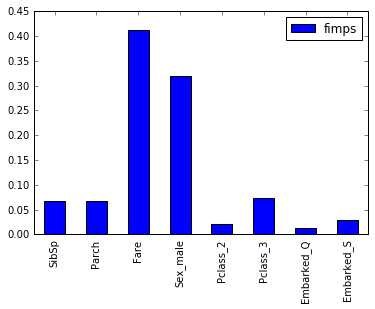

In [11]:
fimps = DataFrame({"fimps": clf.feature_importances_},index=local_train.columns.values[1:])
fimps.plot(kind='bar')